<a href="https://colab.research.google.com/github/harshad-leo/CE888/blob/main/lab%203/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
bank_df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv",sep=";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_df.shape

(41188, 21)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Applying Label Encoder for "y" column only
bank_df_copy = bank_df.copy()
bank_df_copy[["y"]] = bank_df_copy[["y"]].apply(LabelEncoder().fit_transform)
bank_df_copy.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
#Applying get_dummies for categorical values
features =["job","marital","education","default","housing"
            ,"loan","contact","month","day_of_week","poutcome",]

df_dummies = pd.get_dummies(bank_df_copy,columns=features)
df_dummies.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [7]:
df_dummies = df_dummies.drop(labels=["duration","y"],axis=1)
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [8]:
# Separating training set and target 
X_df = df_dummies
y_df = bank_df_copy[bank_df_copy.columns[-1]]


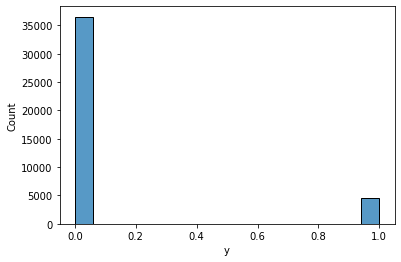

In [9]:
# Plot histogram of the label and calculate the imbalance in the dataset.
sns.histplot(y_df)

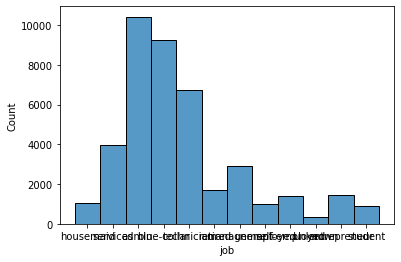

In [10]:
sns.histplot(bank_df["job"])

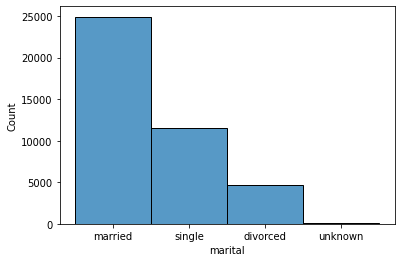

In [11]:
sns.histplot(bank_df["marital"])

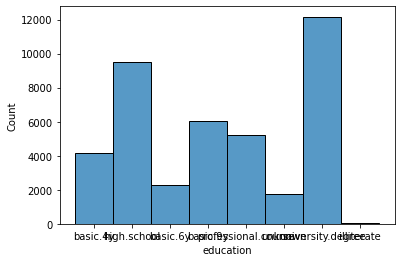

In [12]:
sns.histplot(bank_df["education"])

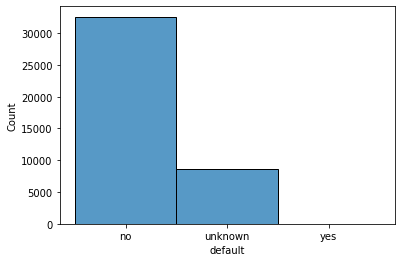

In [13]:
sns.histplot(bank_df["default"])

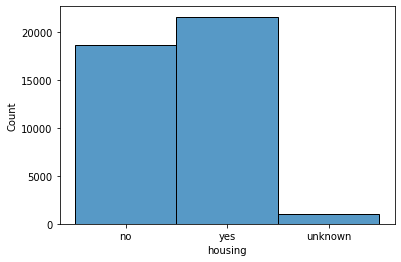

In [14]:
sns.histplot(bank_df["housing"])

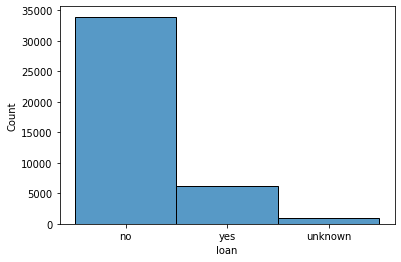

In [15]:
sns.histplot(bank_df["loan"])

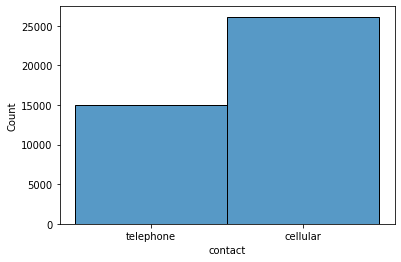

In [16]:
sns.histplot(bank_df["contact"])

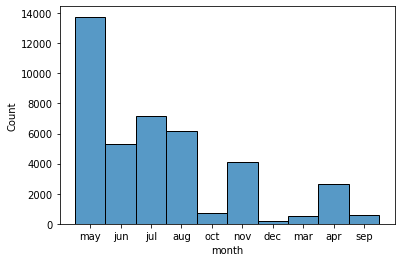

In [17]:
sns.histplot(bank_df["month"])

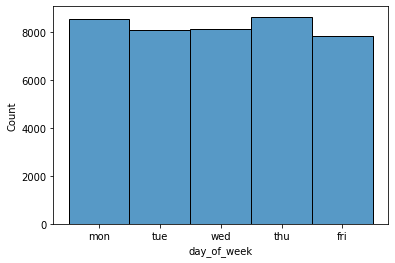

In [18]:
sns.histplot(bank_df["day_of_week"])

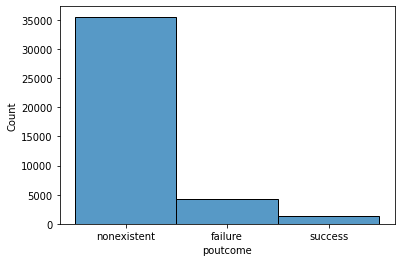

In [19]:
sns.histplot(bank_df["poutcome"])

In [20]:
# Stratification of the training and testing data set
skf = StratifiedKFold(n_splits=7)
for train,test in skf.split(X_df,y_df):
  print("X-train",len(test))

X-train 5884
X-train 5884
X-train 5884
X-train 5884
X-train 5884
X-train 5884
X-train 5884


In [21]:
# Splitting of the data into train and test data sets

X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.20,random_state = 50)
# print(len(X_train),len(y_train),len(X_test),len(y_test))

In [22]:
# Stratification of the training and testing data set
skf = StratifiedKFold(n_splits=10)

for train,test in skf.split(X_train,y_train):
  print("X-train",len(train),"y-train",len(train))
  print("X-train_test",len(test),"y-train_test",len(test))

for train,test in skf.split(X_test,y_test):
  print("X-test",len(train),"y-test",len(train))
  print("X-test_test",len(test),"y-test_test",len(test))

X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-train 29655 y-train 29655
X-train_test 3295 y-train_test 3295
X-test 7414 y-test 7414
X-test_test 824 y-test_test 824
X-test 7414 y-test 7414
X-test_test 824 y-test_test 824
X-test 7414 y-test 7414
X-test_test 824 y-test_test 824
X-test 7414 y-test 7414
X-test_test 824 y-test_test 824
X-test 7414 y-test 7414
X-test_test 824 y-test_test 824
X-test 7414 y-test 7414
X-test_test 824 y-test_test 824
X-test 7414 y-test 7414


In [23]:
#Random Forest Classifier with 100 trees and depth=3
random_frst_clf = RandomForestClassifier(n_estimators=400,max_depth=8,random_state=60)
random_frst_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [24]:
scores = cross_val_score(random_frst_clf,X_train,y_train,cv= 10,scoring="f1")
print(np.mean(scores))

0.30503860480559675


In [25]:
scores = cross_val_score(random_frst_clf,X_test,y_test,scoring="f1")
print(np.mean(scores))

0.283764297244521


In [26]:
# Dummy classifier
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
scores = cross_val_score(dummy_clf,X_train,y_train,cv=10,scoring="f1")
print("Dummy ACC: %.2f" % accuracy_score(y_train, dummy_clf.predict(X_train)))
print(np.mean(scores))

Dummy ACC: 0.80
0.11517548957622226


In [27]:
important_features = random_frst_clf.feature_importances_
indices = np.argsort(important_features)[::-1]
indices[:3]

print("Top 3 Important Features")
for f in range(len(X_train.columns[indices[:3]])):
  print("%d. %s" %(f+1,X_train.columns[indices[f]]))


Important featurs
1. euribor3m
2. nr.employed
3. pdays
